### Подгрузим все необходимые данные

In [4]:
!pip install kaggle
!pip install findspark
!sudo apt install unzip
!sudo apt-get install p7zip-full

!export KAGGLE_USERNAME='borispanfilov'
!export KAGGLE_KEY='23e1a26705b833184e1835da72c45fe3'

Гиганский файл

In [5]:
%%writefile download_archive.sh

pip3 install wldhx.yadisk-direct

URL=$(yadisk-direct https://disk.yandex.ru/d/wcQYvAPZHpih9Q)

wget -O page_views_parquet.zip "${URL}"

In [6]:
!bash ./download_archive.sh

In [7]:
!7z x page_views_parquet.zip

In [8]:
!hdfs dfs -mkdir /user/page_views

!hdfs dfs -put page_views_parquet/* /user/page_views

Остальные

In [9]:
!kaggle competitions download -c outbrain-click-prediction -f clicks_test.csv.zip
!kaggle competitions download -c outbrain-click-prediction -f clicks_train.csv.zip
!kaggle competitions download -c outbrain-click-prediction -f documents_categories.csv.zip
!kaggle competitions download -c outbrain-click-prediction -f documents_entities.csv.zip
!kaggle competitions download -c outbrain-click-prediction -f documents_meta.csv.zip
!kaggle competitions download -c outbrain-click-prediction -f documents_topics.csv.zip
!kaggle competitions download -c outbrain-click-prediction -f events.csv.zip
!kaggle competitions download -c outbrain-click-prediction -f promoted_content.csv.zip
!kaggle competitions download -c outbrain-click-prediction -f sample_submission.csv.zip

!7z x clicks_test.csv.zip
!7z x clicks_train.csv.zip
!7z x documents_categories.csv.zip
!7z x documents_entities.csv.zip
!7z x documents_meta.csv.zip
!7z x documents_topics.csv.zip
!7z x events.csv.zip
!7z x promoted_content.csv.zip
!7z x sample_submission.csv.zip

In [15]:
!hdfs dfs -mkdir /user/bhw_data

!hdfs dfs -put clicks_test.csv /user/bhw_data
!hdfs dfs -put clicks_train.csv /user/bhw_data
!hdfs dfs -put documents_categories.csv /user/bhw_data
!hdfs dfs -put documents_entities.csv /user/bhw_data
!hdfs dfs -put documents_meta.csv /user/bhw_data
!hdfs dfs -put documents_topics.csv /user/bhw_data
!hdfs dfs -put events.csv /user/bhw_data
!hdfs dfs -put promoted_content.csv /user/bhw_data
!hdfs dfs -put sample_submission.csv /user/bhw_data

In [16]:
!hdfs dfs -ls /user/bhw_data

Found 9 items
-rw-r--r--   1 ubuntu hadoop  506953370 2025-03-25 09:52 /user/bhw_data/clicks_test.csv
-rw-r--r--   1 ubuntu hadoop 1486734654 2025-03-25 09:52 /user/bhw_data/clicks_train.csv
-rw-r--r--   1 ubuntu hadoop  118017029 2025-03-25 09:52 /user/bhw_data/documents_categories.csv
-rw-r--r--   1 ubuntu hadoop  324096832 2025-03-25 09:52 /user/bhw_data/documents_entities.csv
-rw-r--r--   1 ubuntu hadoop   89380566 2025-03-25 09:52 /user/bhw_data/documents_meta.csv
-rw-r--r--   1 ubuntu hadoop  339473038 2025-03-25 09:52 /user/bhw_data/documents_topics.csv
-rw-r--r--   1 ubuntu hadoop 1208549589 2025-03-25 09:53 /user/bhw_data/events.csv
-rw-r--r--   1 ubuntu hadoop   13886609 2025-03-25 09:53 /user/bhw_data/promoted_content.csv
-rw-r--r--   1 ubuntu hadoop  273136709 2025-03-25 09:53 /user/bhw_data/sample_submission.csv


### Посмотрим на подргуженные данные

In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession
import pyspark

sc = pyspark.SparkContext(appName="bhw")
spark = SparkSession(sc)

In [24]:
# page_views = spark.read.parquet("/user/page_views")

# clicks_test = spark.read.csv('/user/bhw_data/clicks_test.csv', header=True, inferSchema=True)
# clicks_test.write.parquet("/user/bhw_data/clicks_test.parquet")

# clicks_train = spark.read.csv('/user/bhw_data/clicks_train.csv', header=True, inferSchema=True)
# clicks_train.write.parquet("/user/bhw_data/clicks_train.parquet")

# documents_categories = spark.read.csv('/user/bhw_data/documents_categories.csv', header=True, inferSchema=True)
# documents_categories.write.parquet("/user/bhw_data/documents_categories.parquet")

# documents_entities = spark.read.csv('/user/bhw_data/documents_entities.csv', header=True, inferSchema=True)
# documents_entities.write.parquet("/user/bhw_data/documents_entities.parquet")

# documents_meta = spark.read.csv('/user/bhw_data/documents_meta.csv', header=True, inferSchema=True)
# documents_meta.write.parquet("/user/bhw_data/documents_meta.parquet")

# documents_topics = spark.read.csv('/user/bhw_data/documents_topics.csv', header=True, inferSchema=True)
# documents_topics.write.parquet("/user/bhw_data/documents_topics.parquet")

# events = spark.read.csv('/user/bhw_data/events.csv', header=True, inferSchema=True)
# events.write.parquet("/user/bhw_data/events.parquet")

# promoted_content = spark.read.csv('/user/bhw_data/promoted_content.csv', header=True, inferSchema=True)
# promoted_content.write.parquet("/user/bhw_data/promoted_content.parquet")

# sample_submission = spark.read.csv('/user/bhw_data/sample_submission.csv', header=True, inferSchema=True)
# sample_submission.write.parquet("/user/bhw_data/sample_submission.parquet")

In [5]:
page_views = spark.read.parquet("/user/page_views")

clicks_test = spark.read.parquet('/user/bhw_data/clicks_test.parquet')
clicks_train = spark.read.parquet('/user/bhw_data/clicks_train.parquet')
documents_categories = spark.read.parquet('/user/bhw_data/documents_categories.parquet')
documents_entities = spark.read.parquet('/user/bhw_data/documents_entities.parquet')
documents_meta = spark.read.parquet('/user/bhw_data/documents_meta.parquet')
documents_topics = spark.read.parquet('/user/bhw_data/documents_topics.parquet')
events = spark.read.parquet('/user/bhw_data/events.parquet')
promoted_content = spark.read.parquet('/user/bhw_data/promoted_content.parquet')
sample_submission = spark.read.parquet('/user/bhw_data/sample_submission.parquet')

In [6]:
page_views.show(5)

+--------------+-----------+---------+--------+------------+--------------+
|          uuid|document_id|timestamp|platform|geo_location|traffic_source|
+--------------+-----------+---------+--------+------------+--------------+
|3304d4e2126be0|    1179111| 25701521|       1|       DE>01|             3|
|48182b0908eece|    1179111| 64614352|       1|   US>MN>613|             1|
|58d961fb45578c|    1179111|  1730532|       1|       IN>35|             2|
|33a4f090c5413e|    1179111| 53383240|       1|   US>TX>709|             1|
|a6993d5e6c78a5|    1179111| 78638904|       2|   US>VA>511|             2|
+--------------+-----------+---------+--------+------------+--------------+
only showing top 5 rows



In [7]:
clicks_test.show(5)

+----------+------+
|display_id| ad_id|
+----------+------+
|  16874594| 66758|
|  16874594|150083|
|  16874594|162754|
|  16874594|170392|
|  16874594|172888|
+----------+------+
only showing top 5 rows



In [8]:
clicks_train.show(5)

+----------+------+-------+
|display_id| ad_id|clicked|
+----------+------+-------+
|         1| 42337|      0|
|         1|139684|      0|
|         1|144739|      1|
|         1|156824|      0|
|         1|279295|      0|
+----------+------+-------+
only showing top 5 rows



In [9]:
documents_categories.show(5)

+-----------+-----------+----------------+
|document_id|category_id|confidence_level|
+-----------+-----------+----------------+
|    1870818|       1403|            0.92|
|    1870818|       1702|            0.07|
|    2008670|       1908|            0.92|
|    2008670|       1707|            0.07|
|    1990410|       1604|            0.92|
+-----------+-----------+----------------+
only showing top 5 rows



In [10]:
documents_entities.show(5)

+-----------+--------------------+-----------------+
|document_id|           entity_id| confidence_level|
+-----------+--------------------+-----------------+
|    1524246|f9eec25663db4cd83...|0.672865314504701|
|    1524246|55ebcfbdaff1d6f60...|0.399113728441297|
|    1524246|839907a972930b17b...|0.392095749652966|
|    1524246|04d8f9a1ad48f126d...|0.213996376305138|
|    1617787|612a1d17685a498af...|0.386192829940441|
+-----------+--------------------+-----------------+
only showing top 5 rows



In [11]:
documents_meta.show(5)

+-----------+---------+------------+------------+
|document_id|source_id|publisher_id|publish_time|
+-----------+---------+------------+------------+
|     614868|      722|         925|        null|
|     614869|      722|         925|        null|
|     614870|      722|         925|        null|
|     614871|      722|         925|        null|
|     614872|      722|         925|        null|
+-----------+---------+------------+------------+
only showing top 5 rows



In [12]:
documents_topics.show(5)

+-----------+--------+------------------+
|document_id|topic_id|  confidence_level|
+-----------+--------+------------------+
|    1363957|     194|0.0717097235143966|
|    1363957|     102|0.0544140453511417|
|    1363957|     290|0.0540139593124283|
|    1363957|      41|0.0388109264004699|
|    1363957|     196|0.0318329906164727|
+-----------+--------+------------------+
only showing top 5 rows



In [13]:
events.show(5)

+----------+--------------+-----------+---------+--------+------------+
|display_id|          uuid|document_id|timestamp|platform|geo_location|
+----------+--------------+-----------+---------+--------+------------+
|         1|cb8c55702adb93|     379743|       61|       3|   US>SC>519|
|         2|79a85fa78311b9|    1794259|       81|       2|   US>CA>807|
|         3|822932ce3d8757|    1179111|      182|       2|   US>MI>505|
|         4|85281d0a49f7ac|    1777797|      234|       2|   US>WV>564|
|         5|8d0daef4bf5b56|     252458|      338|       2|       SG>00|
+----------+--------------+-----------+---------+--------+------------+
only showing top 5 rows



In [14]:
promoted_content.show(5)

+-----+-----------+-----------+-------------+
|ad_id|document_id|campaign_id|advertiser_id|
+-----+-----------+-----------+-------------+
|    1|       6614|          1|            7|
|    2|     471467|          2|            7|
|    3|       7692|          3|            7|
|    4|     471471|          2|            7|
|    5|     471472|          2|            7|
+-----+-----------+-----------+-------------+
only showing top 5 rows



In [15]:
sample_submission.show(5)

+----------+--------------------+
|display_id|               ad_id|
+----------+--------------------+
|  20049301|        95725 496356|
|  20049302|4274 124591 14833...|
|  20049303|168205 183761 211...|
|  20049304|837 1733 32407 79...|
|  20049305|111208 176225 287...|
+----------+--------------------+
only showing top 5 rows



### Готовим данные

In [17]:
from pyspark.sql import functions as F
from datetime import datetime
from pyspark.sql.functions import col, collect_list, concat_ws

In [18]:
events = events.withColumn("country", F.expr("element_at(split(geo_location, '>'), 1)")) \
               .withColumn("state", F.expr("element_at(split(geo_location, '>'), 2)")) \
               .withColumn("dma", F.expr("element_at(split(geo_location, '>'), 3)")) \
               .withColumn("event_doc_id", col("document_id"))

In [19]:
train = (
    clicks_train
    .join(promoted_content, on=promoted_content.ad_id == clicks_train.ad_id, how="left")
    .join(events, on=clicks_train.display_id == events.display_id, how="left")
    .select(
        clicks_train.clicked,
        clicks_train.ad_id,
        clicks_train.display_id,
        events.country,
        events.state,
        events.dma,
        events.platform,
        events.timestamp,
        events.event_doc_id,
        promoted_content.document_id,
        promoted_content.campaign_id,
        promoted_content.advertiser_id
    )
)

train.show(5)

+-------+------+----------+-------+-----+---+--------+---------+------------+-----------+-----------+-------------+
|clicked| ad_id|display_id|country|state|dma|platform|timestamp|event_doc_id|document_id|campaign_id|advertiser_id|
+-------+------+----------+-------+-----+---+--------+---------+------------+-----------+-----------+-------------+
|      1| 89351|       148|     US|   LA|612|       2|    11202|     1205772|     990613|       7617|         2181|
|      0|152140|       148|     US|   LA|612|       2|    11202|     1205772|    1060089|      19032|         1593|
|      0|152656|       148|     US|   LA|612|       2|    11202|     1205772|    1086755|      10511|         2151|
|      0|326768|       148|     US|   LA|612|       2|    11202|     1205772|    1379561|      23374|         2348|
|      0| 28270|       463|     US|   SD|764|       1|    34492|     1787133|     845272|       4346|         1913|
+-------+------+----------+-------+-----+---+--------+---------+--------

In [20]:
test = (
    clicks_test
    .join(promoted_content, on=promoted_content.ad_id == clicks_test.ad_id, how="left")
    .join(events, on=clicks_test.display_id == events.display_id, how="left")
    .select(
        clicks_test.ad_id,
        clicks_test.display_id,
        events.country,
        events.state,
        events.dma,
        events.platform,
        events.timestamp,
        events.event_doc_id,
        promoted_content.document_id,
        promoted_content.campaign_id,
        promoted_content.advertiser_id
    )
)

### Преобразуем данные в VW формат

In [22]:
def convert_to_vw(data):    
    clicked = 1 if "clicked" in data and int(data["clicked"]) == 1 else -1
    ad_id = str(data["ad_id"]) if "ad_id" in data else ""
    display_id = str(data["display_id"]) if "display_id" in data else ""
    
    country = str(data["country"]) if "country" in data else ""
    state = str(data["state"]) if "state" in data else ""
    dma = str(data["dma"]) if "dma" in data else ""
#     geo_location = str(data["geo_location"]) if "geo_location" in data else ""

    platform = str(data["platform"]) if "platform" in data else ""
    document_id = str(data["document_id"]) if "document_id" in data else ""
    event_doc_id = str(data["event_doc_id"]) if "event_doc_id" in data else ""
    campaign_id = str(data["campaign_id"]) if "campaign_id" in data else ""
    advertiser_id = str(data["advertiser_id"]) if "advertiser_id" in data else ""
    
    dates = datetime.fromtimestamp(int(data["timestamp"]))

    year = str(dates.year)
    weekday = str(dates.weekday())
    month = str(dates.month)
    
    
    template = "{} |ids ad_id={} display_id={} campaign_id={} advertiser_id={} event_doc_id ={} platform={} document_id={} " +\
                "|place country={} state={} dma={} " +\
                "|time year={} weekday={} month={}"

    return template.format(
        clicked,
        ad_id,
        display_id,
        campaign_id,
        advertiser_id,
        event_doc_id,
        platform,
        document_id,
        country,
        state,
        dma,
        year,
        weekday,
        month
    )


In [23]:
!hdfs dfs -rm -r /user/bhw_data/train.vw
!hdfs dfs -rm -r /user/bhw_data/test.vw

Deleted /user/bhw_data/train.vw
Deleted /user/bhw_data/test.vw


In [24]:
train.rdd.map(convert_to_vw).saveAsTextFile('/user/bhw_data/train.vw')

In [25]:
test.rdd.map(convert_to_vw).saveAsTextFile('/user/bhw_data/test.vw')

In [26]:
# !hdfs dfs -ls /user/bhw_data

In [27]:
!hdfs dfs -cat /user/bhw_data/train.vw/* > train.vw
!hdfs dfs -cat /user/bhw_data/test.vw/* > test.vw

In [28]:
!head -n 7 train.vw

1 |ids ad_id=89351 display_id=148 campaign_id=7617 advertiser_id=2181 event_doc_id =1205772 platform=2 document_id=990613 |place country=US state=LA dma=612 |time year=1970 weekday=3 month=1
-1 |ids ad_id=152140 display_id=148 campaign_id=19032 advertiser_id=1593 event_doc_id =1205772 platform=2 document_id=1060089 |place country=US state=LA dma=612 |time year=1970 weekday=3 month=1
-1 |ids ad_id=152656 display_id=148 campaign_id=10511 advertiser_id=2151 event_doc_id =1205772 platform=2 document_id=1086755 |place country=US state=LA dma=612 |time year=1970 weekday=3 month=1
-1 |ids ad_id=326768 display_id=148 campaign_id=23374 advertiser_id=2348 event_doc_id =1205772 platform=2 document_id=1379561 |place country=US state=LA dma=612 |time year=1970 weekday=3 month=1
-1 |ids ad_id=28270 display_id=463 campaign_id=4346 advertiser_id=1913 event_doc_id =1787133 platform=1 document_id=845272 |place country=US state=SD dma=764 |time year=1970 weekday=3 month=1
1 |ids ad_id=38813 display_id=46

### Обучим модель и получим результаты для соревнования

In [29]:
!vw --final_regressor model4.bin \
    --loss_function logistic \
    --bit_precision 28 \
    --passes 2 \
    --cache -k \
    --quadratic :: \
    --ftrl \
    --ftrl_alpha 0.01 \
    --ftrl_beta 0.1 \
    --l1 20 \
    train.vw

creating quadratic features for pairs: :: 
You can use --leave_duplicate_interactions to disable this behaviour.
using l1 regularization = 20
final_regressor = model4.bin
Enabling FTRL based optimization
Algorithm used: Proximal-FTRL
ftrl_alpha = 0.01
ftrl_beta = 0.1
Num weight bits = 28
learning rate = 0.5
initial_t = 0
power_t = 0.5
decay_learning_rate = 1
creating cache_file = train.vw.cache
Reading datafile = train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0   1.0000   0.0000      120
0.693147 0.693147            2            2.0  -1.0000   0.0000      120
0.693147 0.693147            4            4.0  -1.0000   0.0000      120
0.693147 0.693147            8            8.0  -1.0000   0.0000      120
0.693147 0.693147           16           16.0  -1.0000   0.0000      120
0.693147 0.693147           32           32.0  

In [30]:
! vw \
    --link=logistic \
    --testonly \
    --initial_regressor model4.bin \
    --predictions test_predictions4.txt \
    test.vw

creating quadratic features for pairs: :: 
You can use --leave_duplicate_interactions to disable this behaviour.
only testing
predictions = test_predictions4.txt
Enabling FTRL based optimization
Algorithm used: Proximal-FTRL
ftrl_alpha = 0.005
ftrl_beta = 0.1
Num weight bits = 28
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = test.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.345513 0.345513            1            1.0  -1.0000   0.1697      120
0.629447 0.913382            2            2.0  -1.0000   0.1239      120
0.377407 0.125367            4            4.0  -1.0000   0.1997      120
0.256965 0.136522            8            8.0  -1.0000   0.1646      120
0.504912 0.752859           16           16.0  -1.0000   0.3777      120
0.783198 1.061484           32           32.0  -1.0000   0.0502      120
0.937264 1.091330           6

In [31]:
!head -n 10 test_predictions4.txt

0.169693
0.123932
0.211434
0.199698
0.226889
0.231316
0.321958
0.164636
0.165586
0.075165


In [32]:
!wc -l test_predictions4.txt

32225162 test_predictions4.txt


In [44]:
!wc -l test.vw

32225162 test.vw


### Преобразовываем предсказания в нужный формат

In [2]:
!head -n 3 test.vw

-1 |ids ad_id=137006 display_id=16874807 campaign_id=17587 advertiser_id=859 event_doc_id =399863 platform=2 document_id=916403 |place country=AU state=02 dma=None |time year=1970 weekday=4 month=1
-1 |ids ad_id=192759 display_id=16874807 campaign_id=22742 advertiser_id=1975 event_doc_id =399863 platform=2 document_id=1469601 |place country=AU state=02 dma=None |time year=1970 weekday=4 month=1
-1 |ids ad_id=192855 display_id=16874807 campaign_id=22748 advertiser_id=622 event_doc_id =399863 platform=2 document_id=1460834 |place country=AU state=02 dma=None |time year=1970 weekday=4 month=1


In [3]:
!head -n 3 test_predictions4.txt

0.169693
0.123932
0.211434


In [5]:
import pandas as pd
clicks_pd = pd.DataFrame()

with open('test.vw', 'r') as f:
    a, b = [], []
    for line in f:
        a.append(line.split("display_id=")[1].split()[0])
        b.append(line.split("ad_id=")[1].split()[0])
        
    clicks_pd['display_id'] = a
    clicks_pd['ad_id'] = b

with open('test_predictions4.txt', 'r') as f:
    clicks_pd['score'] = list([float(val) for val in f.readlines()])

clicks_pd.head(5)

,display_id,ad_id,score
0,16874807,137006,0.169693
1,16874807,192759,0.123932
2,16874807,192855,0.211434
3,16874807,213769,0.199698
4,16874827,64762,0.226889


In [6]:
clicks_pd = clicks_pd.sort_values(['display_id', 'score'], ascending=False).groupby('display_id').agg({'ad_id': list})
clicks_pd['ad_id'] = clicks_pd['ad_id'].apply(lambda x: ' '.join(map(str, x)))
clicks_pd.to_csv('final.csv')

In [7]:
clicks_pd.shape

(6245533, 1)

In [8]:
!head -n 10 final.csv

display_id,ad_id
16874594,170392 172888 162754 66758 150083 180797
16874595,8846 143982 30609
16874596,132820 11430 289915 289122 153260 57197 173005 288385
16874597,285834 305790 143981 182039 308836 155945 180965 137858
16874598,145937 335632 67292 250082
16874599,91681 173130 210516 296295 213116 163776
16874600,57591 70529 30682 2150 133050 114836
16874601,190713 92003 129490 140942 14082 118470
16874602,154918 281563 269017 131316 268548


In [9]:
!wc -l final.csv

6245534 final.csv


In [10]:
!hdfs dfs -put -f final.csv s3a://bspanfilov-lsml/bhw_submit4_1.csv

2025-03-26 14:11:49,717 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2025-03-26 14:11:50,349 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2025-03-26 14:11:50,349 INFO impl.MetricsSystemImpl: s3a-file-system metrics system started
2025-03-26 14:12:05,433 INFO impl.MetricsSystemImpl: Stopping s3a-file-system metrics system...
2025-03-26 14:12:05,433 INFO impl.MetricsSystemImpl: s3a-file-system metrics system stopped.
2025-03-26 14:12:05,433 INFO impl.MetricsSystemImpl: s3a-file-system metrics system shutdown complete.


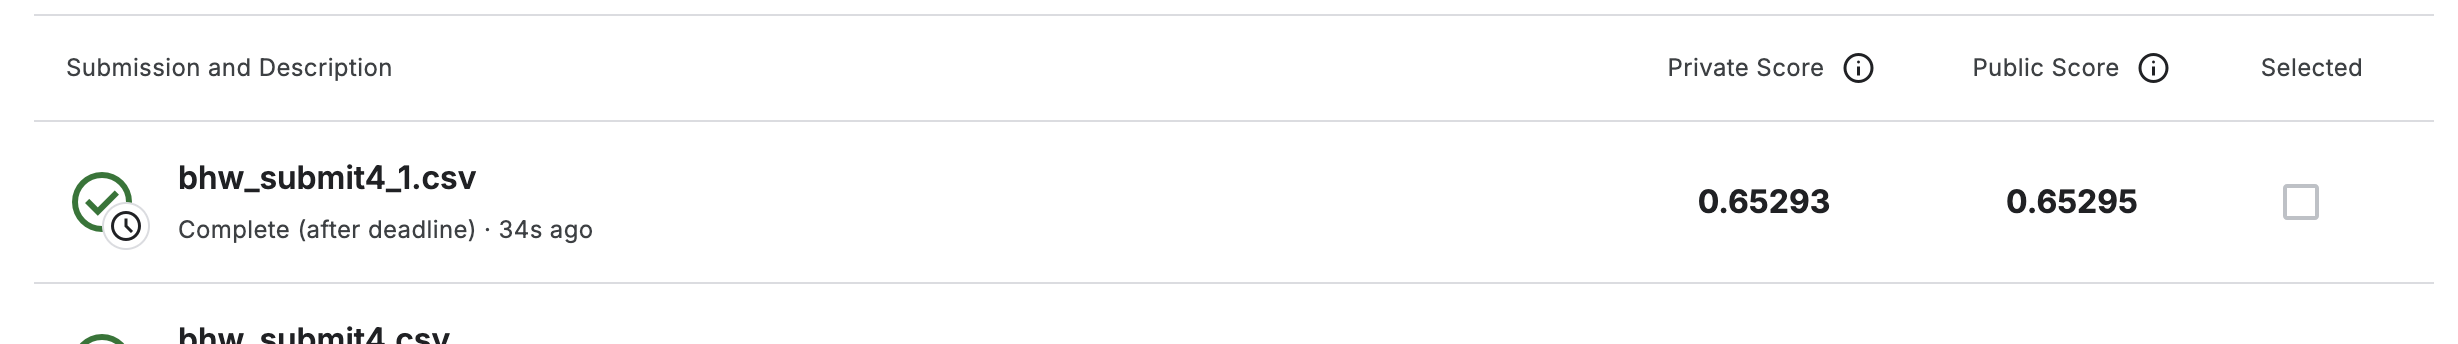

сслыка на яндекс диск на всякий https://disk.yandex.ru/i/lTa0_fHeb6XwYg